<a href="https://colab.research.google.com/github/Thantawan6509650427/246datavi/blob/main/Ai_for_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. Dowloading Datasets (โหลด ชุดข้อมูล)


Dataset link download https://tuipied-my.sharepoint.com/:f:/g/personal/tanatorn_tu_ac_th/Egir27w3VCFOio3qooQ5wZsB5EPyb8JxIsspIOATjrL-yw?e=JD4M4B


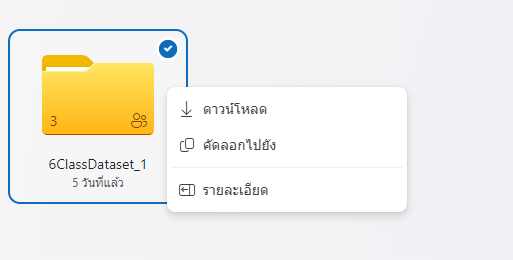

เมื่อโหลดไฟล์แล้ว ต้องแตกไฟล์แล้วให้เก็บข้อมูลไว้ใน Google Drive
โดยที่ Path ของไฟล์สามารถเก็บได้ตามใจชอบ
เช่นเก็บไว้ที่ /content/gdrive/MyDrive/dataset ดังรูป

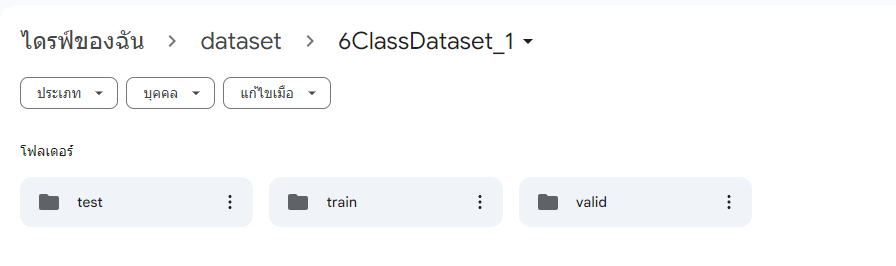

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Import Library and Dataset


In [ ]:
!pip install tensorflow # Installs TensorFlow library
!pip install keras # Installs keras library

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import efficientnet_v2 , NASNetLarge
import tensorflow_hub as hub
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os
from datetime import datetime

%matplotlib inline

In [ ]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


#2.  data preparation (การเตรียม ชุดข้อมูล)

**การเตรียมข้อมูล**

เป็นการจัดการชุดข้อมูลที่ได้รับมาให้เหมาะสมหรือสามารถนำมาใช้งานได้ในการ Train

อ้างอิง: https://www.nerd-data.com/data_preparation/

In [ ]:
train_path = "/content/gdrive/MyDrive/CS246Datavi/ttv/train" # @param{type:"string"}
test_path = "/content/gdrive/MyDrive/CS246Datavi/ttv/test" # @param{type:"string"}
valid_path = "/content/gdrive/MyDrive/CS246Datavi/ttv/valid" # @param{type:"string"}

In [ ]:
# @title 2.1. Set up Custom parameter Datagen { display-mode: "form" }
ROTATION_RANGE = 0 # @param {type:"number"}
HORIZONTAL_FLIP = False # @param{type:"boolean"}
VERTICAL_FLIP = False # @param{type:"boolean"}
ZOOM_RANGE = 0 # @param {type:"number"}
WIDTH_SHIFT_RANGE = 0 # @param {type:"number"}
HEIGHT_SHIFT_RANGE = 0 # @param {type:"number"}

BATCH_SIZE = 32 # @param{type:"integer"}
IMAGE_SIZE = 224 # @param{type:"integer"}





**โดย จะมีตัวอย่างของแต่ละการทำของ ImageDataGenerator ดังนี้**
1. Random Rotation ( สุ่ม หมุนภาพ )
parameter คือ ROTATION_RANGE เป็นการกำหนดช่วงการหมุนภาพในหน่วยองศา เมื่อกำหนดค่าเริ่มต้นและสิ้นสุดของช่วงการหมุน โมเดลจะสุ่มหมุนภาพในช่วงนั้นเพื่อให้โมเดลเรียนรู้ได้ดีกว่าในสภาวะที่ภาพไม่ได้ถูกหมุน โดยค่า parameter จะเป็นหน่วยองศา 0-359

2. Random Shifts คือการเคลื่อนย้าย (shift) ภาพไปในทิศทางต่างๆ อย่างสุ่มเพื่อเพิ่มความหลากหลายในชุดข้อมูลที่ใช้ในการฝึกสอนโมเดลเชิงลึก (Deep Learning) ซึ่งเป็นหนึ่งในเทคนิคในการเตรียมข้อมูลภาพที่มีประสิทธิภาพเพื่อป้องกันการเรียนรู้จากลักษณะเฉพาะของภาพในชุดข้อมูล


3. Random Flips คือการทำการพลิกภาพในแนวนอน (horizontal flip) หรือในแนวตั้ง (vertical flip) อย่างสุ่มขณะเตรียมข้อมูลภาพสำหรับการฝึกสอนโมเดลเชิงลึก (Deep Learning) โดยมักจะใช้กับชุดข้อมูลภาพเพื่อเพิ่มความหลากหลายในการเรียนรู้ของโมเดลซึ่งช่วยลดโอกาสของการเกิดการเรียนรู้จากลักษณะของภาพที่มีเพียงแค่มุมมองหรือทิศทางการถ่ายทอดซึ่งเป็นการเพิ่มความคล้ายคลึงในการเรียนรู้ของโมเดลให้มีความคุ้นเคยกับสภาพการเอาไว้ของข้อมูลเพิ่มขึ้น

  4.
Random Brightness คือการเพิ่มหรือลดความสว่างของภาพอย่างสุ่มเพื่อเตรียมข้อมูลสำหรับการฝึกสอนโมเดลเชิงลึก (Deep Learning) โดยการปรับความสว่างนี้สามารถทำให้โมเดลมีความสามารถในการรับมือกับความแตกต่างของการสว่างแสงในภาพที่แตกต่างกันได้ เช่น การถ่ายภาพในสภาพแสงแดดแรงและสภาพแสงมัวหมอง เป็นต้น


5. Random Zoom คือการซูมภาพเข้าหรือซูมออกอย่างสุ่มเพื่อเตรียมข้อมูลสำหรับการฝึกสอนโมเดลเชิงลึก (Deep Learning) โดยการปรับการซูมนี้สามารถช่วยเพิ่มความหลากหลายในชุดข้อมูลและช่วยให้โมเดลมีความสามารถในการรับมือกับการเปลี่ยนแปลงขนาดของวัตถุในภาพได้

อ้างอิง: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/#:~:text=Keras%20ImageDataGenerator%20class%20provides%20a,on%20its%20official%20documentation%20page.

In [ ]:
# @title 2.2 Run ImageDataGenerator

train_datagen = ImageDataGenerator( width_shift_range = WIDTH_SHIFT_RANGE ,
                                   height_shift_range = HEIGHT_SHIFT_RANGE,
                                   rotation_range =  ROTATION_RANGE ,
                                   horizontal_flip =  HORIZONTAL_FLIP ,
                                   vertical_flip = VERTICAL_FLIP ,
                                   zoom_range = ZOOM_RANGE)
train_generator = train_datagen.flow_from_directory(
        directory=train_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')


test_datagen = ImageDataGenerator( width_shift_range = WIDTH_SHIFT_RANGE ,
                                   height_shift_range = HEIGHT_SHIFT_RANGE,
                                   rotation_range =  ROTATION_RANGE ,
                                   horizontal_flip =  HORIZONTAL_FLIP ,
                                   vertical_flip = VERTICAL_FLIP ,
                                   zoom_range = ZOOM_RANGE)
test_generator = test_datagen.flow_from_directory(
        directory=test_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle = False,
        class_mode='categorical')


valid_datagen = ImageDataGenerator( width_shift_range = WIDTH_SHIFT_RANGE ,
                                   height_shift_range = HEIGHT_SHIFT_RANGE,
                                   rotation_range =  ROTATION_RANGE ,
                                   horizontal_flip =  HORIZONTAL_FLIP ,
                                   vertical_flip = VERTICAL_FLIP ,
                                   zoom_range = ZOOM_RANGE)
valid_generator = valid_datagen.flow_from_directory(
        directory=valid_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle = False,
        class_mode='categorical')



Found 448 images belonging to 3 classes.
Found 76 images belonging to 3 classes.
Found 74 images belonging to 3 classes.


In [ ]:
class_names = train_generator.class_indices
class_names


{'โรคดอกกระถิน': 0, 'โรคใบจุดสีน้ำตาล': 1, 'โรคไหม้': 2}

In [ ]:
CLASS_SIZE = len(class_names)


#3. Create Model
ในการสร้างปัญญาประดิษฐ์ ในปัจจุบันมีการเขียนหรือสร้าง Model ต้นแบบที่มีก่อนหน้าเพื่อเป็นแนวทางในการสร้าง Training datasets ของเราโดยใน workshop นี้ได้นำ Model ที่สำเร็จรูปมา 4 โมเดลคือ


1.   MobileNetV3Small
2.   RestNet-50
3.   EfficientNetV2L
4.   NASNetLarge



In [ ]:
import random
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # TF 2.1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

#set seed

In [ ]:
# @title เลือก Model ที่นำมาใช้ Train
model_name = "MobileNetV3Small" # @param ["MobileNetV3Small", "RestNet-50",  "EfficientNetV2L", "NASNetLarge"]

In [ ]:
if model_name =="MobileNetV3Small" :
  base_model = keras.applications.MobileNetV3Small(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),include_top=False, weights='imagenet') # Load the MobileNetV3Small model
  base_model.trainable = True # Enable to train Pre-Trained Model
if model_name == "RestNet-50":
  base_model = ResNet50(
    input_shape = [IMAGE_SIZE , IMAGE_SIZE ] + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
  )
  base_model.trainable = True # Enable to train Pre-Trained Model
if model_name == "EfficientNetV2L":
  base_model = efficientnet_v2.EfficientNetV2B0(include_top=False,
                                                input_shape= [IMAGE_SIZE , IMAGE_SIZE ] + [3],
                                                weights="imagenet")

if model_name == "NASNetLarge":
  base_model = NASNetLarge(

    include_top=False,
    input_shape = [IMAGE_SIZE , IMAGE_SIZE ] + [3],
    weights="imagenet",
  )


inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer") # Define input layer


4334752/4334752 [==============================] - 0s 0us/step


In [ ]:

x = inputs # Apply Augmentation to the input images. this use for decrease overfit
x = base_model(x, training=False) # Pass Augmentation Data to base_model
x = layers.GlobalAveragePooling2D(name="GloPool")(x) # Create Global Average Pooling and input x to get output tensor that value = Dense's filter. this use for decrease feature map
outputs = tf.keras.layers.Dense(CLASS_SIZE, activation="softmax", name="output_layer")(x) # output layer that (output unit = CLASS_SIZE as image class, activation function is softmax  )
model_0 = tf.keras.Model(inputs, outputs) # Create Model name model_0 that have input layer, base mosel, output layer
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"]) #Compile model_0 with categorical_crossentropy, adam's learning rate = 0.0001, metric by accuracy


In [ ]:
model_0.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 GloPool (GlobalAveragePool  (None, 576)               0         
 ing2D)                                                          
                                                                 
 output_layer (Dense)        (None, 3)                 1731      
                                                                 
Total params: 940851 (3.59 MB)
Trainable params: 928739 (3.54 MB)
Non-trainable params: 12112 (47.31 KB)
_________________________________________________________________


In [ ]:
custom_early_stopping = EarlyStopping( # EarlyStopping is keras's callback function that stop training model before overfitting
    monitor='val_accuracy', # monitor at validation loss
    patience=10,
    min_delta=0.000000001, # if validation loss is not decrease at least 0.001 in 10 time
    mode='min' # need validtion loss to decrease
)

#3.Train Model

In [ ]:
start = datetime.now()

history = model_0.fit(train_generator, # Use from train generator
           epochs=30, # training round
           workers=0,
           steps_per_epoch=len(train_generator), # Use from batch size that can update each epoch for training
           validation_data=valid_generator, # Use from test generator
           validation_steps=len(valid_generator),
           callbacks=[custom_early_stopping]) # Stop training when overfitting

print ('Execution Time: ',datetime.now()-start)


Epoch 1/30
14/14 [==============================] - 112s 7s/step - loss: 0.7597 - accuracy: 0.6763 - val_loss: 0.8100 - val_accuracy: 0.6622
Epoch 2/30
14/14 [==============================] - 24s 2s/step - loss: 0.3207 - accuracy: 0.8728 - val_loss: 0.5547 - val_accuracy: 0.7432
Epoch 3/30
14/14 [==============================] - 25s 2s/step - loss: 0.1634 - accuracy: 0.9576 - val_loss: 0.4828 - val_accuracy: 0.7703
Epoch 4/30
14/14 [==============================] - 29s 2s/step - loss: 0.0876 - accuracy: 0.9844 - val_loss: 0.3982 - val_accuracy: 0.8378
Epoch 5/30
14/14 [==============================] - 24s 2s/step - loss: 0.0452 - accuracy: 0.9911 - val_loss: 0.3356 - val_accuracy: 0.8243
Epoch 6/30
14/14 [==============================] - 23s 2s/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.2829 - val_accuracy: 0.8649
Epoch 7/30
14/14 [==============================] - 23s 2s/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.2672 - val_accuracy: 0.8649
Epoch 8/30
14/14 [=

In [ ]:
import os

# เข้าถึงไดเร็กทอรีและตรวจสอบไฟล์ทั้งหมดในไดเร็กทอรี
def check_directory_structure(directory_path):
    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} does not exist.")
        return

    files = os.listdir(directory_path)

    # ตรวจสอบว่ามีไฟล์ในโฟลเดอร์หรือไม่
    if not files:
        print(f"No files found in directory {directory_path}.")
    else:
        print(f"Files found in directory {directory_path}:")
        for file in files:
            print(file)

# เรียกใช้งานเพื่อตรวจสอบโครงสร้างของไดเร็กทอรีที่ระบุ
check_directory_structure(train_path)
check_directory_structure(test_path)
check_directory_structure(valid_path)

Files found in directory /content/gdrive/MyDrive/CS246Datavi/ttv/train:
โรคใบจุดสีน้ำตาล
โรคไหม้
โรคดอกกระถิน
Files found in directory /content/gdrive/MyDrive/CS246Datavi/ttv/test:
โรคไหม้
โรคดอกกระถิน
โรคใบจุดสีน้ำตาล
Files found in directory /content/gdrive/MyDrive/CS246Datavi/ttv/valid:
โรคใบจุดสีน้ำตาล
โรคดอกกระถิน
โรคไหม้


In [ ]:
#@title 3.2. Evaluate the model on the test set
test_loss, test_acc = model_0.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

<ipython-input-19-74d96c32e9dc>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model_0.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 0.05593673884868622
Test accuracy: 0.9868420958518982


#เป็นภาษาไทย

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

#4.Evaluate Model (สรุปผล Model)






เป็นการ ประเมิณผลว่า Model ที่ Train มานั้นทำงานได้น่าพึงพอใจหรือไม่โดยใน Task classification วิธีการวัดผลที่ใช้กันคือการทำ Confusion Matrix ซึ่งประกอบด้วย 4 อย่างดังนี้


1.  True Positive (TP) คือ โมเดลจำแนกได้อย่างถูกต้องตรงกับค่าจริงที่คาดหวัง
2.  True Negative (TN) คือโมเดลจำแนกได้อย่างถูกต้องตรงกับค่าจริงที่ไม่ได้คาดหวัง
3.  False Positive (FP) คือ โมเดลจำแนกผิดพลาดไม่ตรงกับค่าจริงแต่ตรงกับค่าที่คาดหวัง
4.  False Negative (FN) คือ โมเดลจำแนกผิดพลาดไม่ตรงกับค่าจริง และตรงกับค่าที่ไม่คาดหวัง


In [ ]:
# Evaluate the model on the test set
start = datetime.now()
test_loss, test_acc = model_0.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test Time:',datetime.now()-start)


<ipython-input-21-0897c54d69da>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model_0.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 0.05593673884868622
Test accuracy: 0.9868420958518982
Test Time: 0:00:02.891209


3/3 [==============================] - 2s 214ms/step


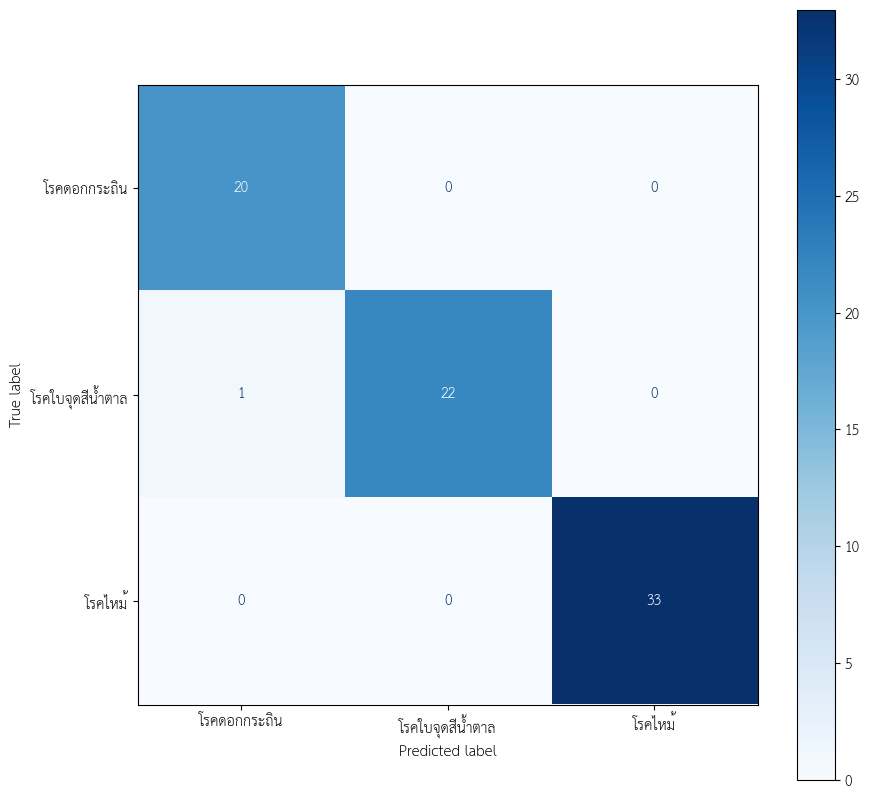

,class,specificity,sensitivity
0,0,0.982143,1.000000
1,1,1.000000,0.956522
2,2,1.000000,1.000000


In [ ]:
import sklearn as scikit_learn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

test_true=test_generator.classes[test_generator.index_array]
test_pred_raw = model_0.predict(test_generator)
test_pred = np.argmax(test_pred_raw, axis=1)

cm = confusion_matrix(test_true, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()


res = []
for l in range(CLASS_SIZE):
    pres,recall,_,_ = precision_recall_fscore_support(np.array(test_true)==l,np.array(test_pred)==l,pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','specificity','sensitivity'])


In [ ]:
from sklearn.metrics import classification_report


report = classification_report(test_true, test_pred, target_names=class_names)
print(report)


                  precision    recall  f1-score   support

    โรคดอกกระถิน       0.95      1.00      0.98        20
โรคใบจุดสีน้ำตาล       1.00      0.96      0.98        23
         โรคไหม้       1.00      1.00      1.00        33

        accuracy                           0.99        76
       macro avg       0.98      0.99      0.98        76
    weighted avg       0.99      0.99      0.99        76



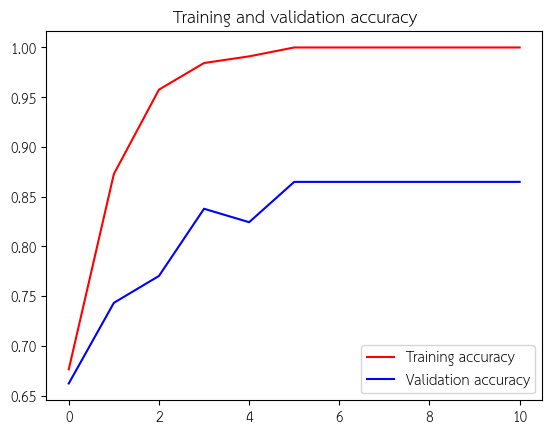

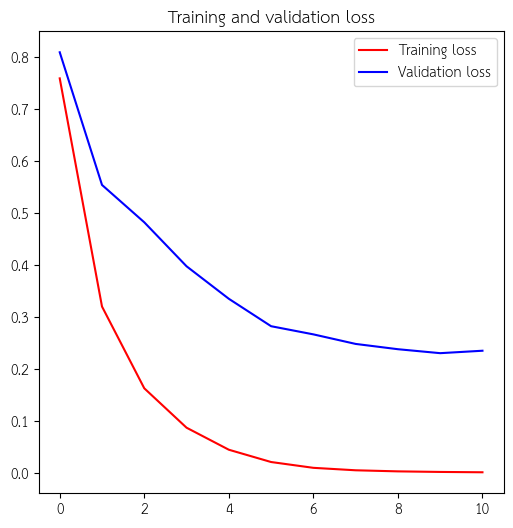

<Figure size 600x600 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

plt.show()


#5. Save & Load h5 Model


หลังจากการ Train Model จะนำไปสู่ขั้นตอนเก็บโมเดลหรือการ export มาจาก colab เพื่่อนำไปใช้งานต่อ ได้ดังนี้

In [ ]:
# Save the trained model to a .h5 file
model_0.save('/content/gdrive/MyDrive/dataset/model/trainedmodel.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/dataset/model/trainedmodel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
tflite_model = converter.convert()
open("/content/gdrive/MyDrive/dataset/model/tflitemodel.tflite", "wb").write(tflite_model)


1118752

#6.Deploy and Test with real  image

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  file_name=fn

Saving RRDI_Flash_Smut3.jpg to RRDI_Flash_Smut3.jpg
User uploaded file "RRDI_Flash_Smut3.jpg" with length 44938 bytes


1/1 [==============================] - 0s 49ms/step
Image name: RRDI_Flash_Smut3.jpg
Predicted class: โรคดอกกระถิน (97.23%)
Prediction:  ['97.23%', '0.01%', '2.76%']


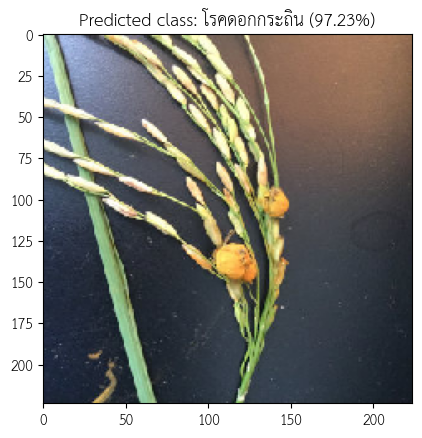

In [ ]:
img = image.load_img(file_name, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v3.preprocess_input(img_array)

    # Make prediction
prediction = model.predict(img_array)
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()} # reverse the class_indices dictionary
predicted_class = np.argmax(prediction, axis=1)
predicted_class_name = class_names[predicted_class[0]]
predicted_prob = np.max(prediction, axis=1)

    # Print the result
print("Image name:", file_name)
print("Predicted class: {} ({:.2f}%)".format(predicted_class_name, predicted_prob[0]*100))
prediction_list = prediction.tolist() # Convert the NumPy array to a Python list
prediction_formatted = ["{:.2%}".format(p) for p in prediction_list[0]]
print("Prediction: ", prediction_formatted)
plt.imshow(img)
plt.title("Predicted class: {} ({:.2f}%)".format(predicted_class_name, predicted_prob[0]*100))
plt.show()
print("\n")